In [1]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리
from sklearn.cluster import KMeans #k-means clustering 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/clustering

/content/gdrive/My Drive/clustering


In [4]:
cs_data = pd.read_csv("Cust_Segmentation.csv")
cs_data=cs_data.drop(['Address','Customer Id','Card Debt','Age','Edu','Income','Defaulted','Other Debt'],axis=1)
cs_data.head()

,Years Employed,DebtIncomeRatio
0,6,6.3
1,26,12.8
2,10,20.9
3,4,6.3
4,31,7.2


In [5]:
cs_data=cs_data.dropna(how='any')
cs_data

,Years Employed,DebtIncomeRatio
0,6,6.3
1,26,12.8
2,10,20.9
3,4,6.3
4,31,7.2
...,...,...
845,5,6.8
846,7,7.0
847,0,33.4
848,12,2.9


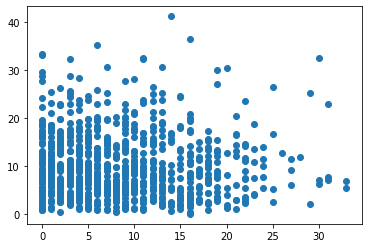

In [6]:
import matplotlib.pyplot as plt
X=cs_data.values
plt.scatter(X[:,0],X[:,1])

In [22]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_samples(X, labels, metirc ='euclidean')
silhouette_score(X, labels, metric='euclidean')

NameError: ignored

In [7]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

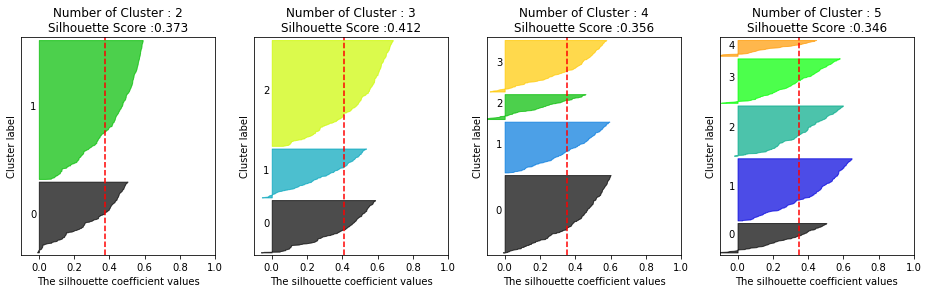

In [8]:
visualize_silhouette([ 2, 3, 4, 5], cs_data)

In [17]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
cs_data['cluster'] = kmeans.labels_
cs_data.head()

,Years Employed,DebtIncomeRatio,cluster
0,6,6.3,1
1,26,12.8,2
2,10,20.9,0
3,4,6.3,1
4,31,7.2,2


Text(0.5, 1.0, 'K-means')

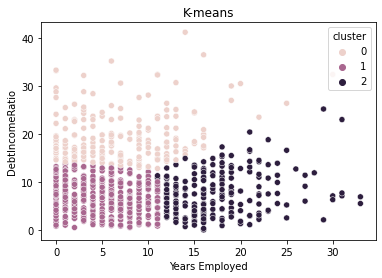

In [19]:
import seaborn as sns

sns.scatterplot(x='Years Employed', y='DebtIncomeRatio',data=cs_data, hue='cluster')
plt.title('K-means')

In [12]:
#mean shift
from sklearn.cluster import MeanShift
MeanShift()

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, max_iter=300,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [20]:
cs_data2=cs_data.copy()

meanshift = MeanShift()
cluster_labels = meanshift.fit_predict(cs_data2)
print('cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1]


In [14]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(cs_data2)
print('bandwidth 값 : ', round(bandwidth, 2))

bandwidth 값 :  8.37


In [15]:
meanshift = MeanShift(bandwidth=8.37)
cs_data2['cluster'] = meanshift.fit_predict(cs_data2)
cs_data2.head()

,Years Employed,DebtIncomeRatio,cluster
0,6,6.3,0
1,26,12.8,1
2,10,20.9,0
3,4,6.3,0
4,31,7.2,1


Text(0.5, 1.0, 'Mean shift')

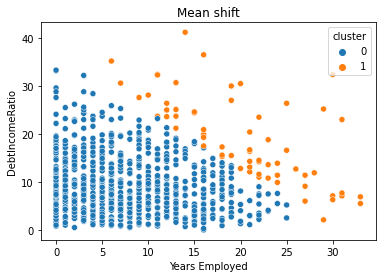

In [16]:
sns.scatterplot(x='Years Employed', y='DebtIncomeRatio',data=cs_data2, hue='cluster')
plt.title('Mean shift')